In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
relationship_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Connection Matrix.csv', index_col=0)
constraint_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Seating Constraints.csv', index_col=0)
guest_list_df = pd.read_csv('../data/raw/Wedding Guest Network Data - Guest List.csv', index_col=0)

In [3]:
relationship_mtx

,Richard Pattison,Kathryn Russell,Tim Balzer,Mac Pattison,Ali Pattison,Ella Pattison,Mary Pattison,William Pattison,Wally Pattison,Holly Pattison,...,Sean Martin,Nefeli Chondrogianni,Sean Neel,Jenny Falberg,Pat Jr. Pattison,Morgan Pattison,MC Davault,Ryan Hurley,Michael Baldea,Guest Baldea
Richard Pattison,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0
Kathryn Russell,3.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,3.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0
Tim Balzer,3.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,3.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0
Mac Pattison,3.0,0.0,0.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
Ali Pattison,3.0,0.0,0.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morgan Pattison,2.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,0.0,0.0
MC Davault,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
Ryan Hurley,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
Michael Baldea,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0


In [4]:
constraint_mtx.fillna(0, inplace=True)

In [5]:
all(constraint_mtx.columns == relationship_mtx.columns) and all(constraint_mtx.index == relationship_mtx.index) and all(constraint_mtx.index == constraint_mtx.columns)

True

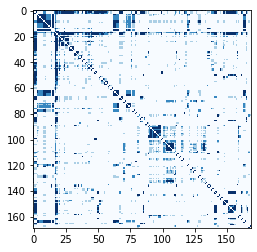

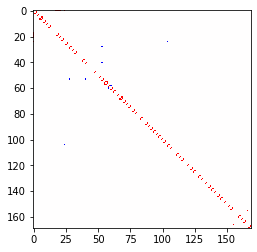

In [6]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.values, cmap='Blues', interpolation='nearest')
plt.show()

plt.imshow(constraint_mtx.values, cmap='bwr', interpolation='nearest')
plt.show()

In [7]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[:50]

Mary Balzer            350.0
Richard Pattison       283.0
Max Balzer             227.0
Kathryn Russell        222.0
Tim Balzer             210.0
Holly Pattison         129.0
Wally Pattison         123.0
Genevieve Geoghan      103.0
Mac Pattison            92.0
Mary Grace Pattison     84.0
Maggie Dunn             79.0
Pat Jr. Pattison        76.0
Pat Pattison            73.0
Marie Pattison          73.0
Oscar Nordness          73.0
Ali Pattison            68.0
Molly Bammerlin         68.0
Suzie Campen            67.0
Tim Campen              67.0
Judy Bell               66.0
James Rogers            66.0
Christie Ranges         65.0
Daryl Bammerlin         64.0
Morgan Pattison         64.0
Bonnie Neel             62.0
Murd Neel               62.0
Ella Pattison           62.0
Harper Bammerlin        62.0
Olivia Bammerlin        62.0
Mary Pattison           62.0
William Pattison        62.0
Cody Vild               61.0
Sloane Fowkes           60.0
Angelo Morales          57.0
Andrew Campen 

In [8]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[-50:]

Sam Ingraffia           26.0
Ellen Ahlgren           26.0
Jake Bottiglieri        26.0
Toni Hepburn            26.0
Natalie Kanshanchi      26.0
Jacques Sisteron        26.0
Erik Ahlgren            25.0
Kaitlin Olson           25.0
Anneli Ahlgren          24.0
Sam Waring              24.0
Johan Ahlgren           24.0
Maggie McGinley         24.0
Claire Meunier          24.0
Cara Touretzky          23.0
Hamideh Soltanzadeh     23.0
Charlie Coolidge        22.0
Sam Nicholson           22.0
Jukka Aromaa            21.0
Paul Davault            21.0
Jenny Falberg           21.0
Daniel Cohen            20.0
Bob Olson               20.0
Ryan Hurley             20.0
Tori Iannuzzi           20.0
Kendra Ruth             19.0
John Mazza              19.0
Molly Hamrick           18.0
Aaron Hoogstraten       17.0
Maan Sangid             16.0
Mallory Chandler        16.0
Michael Baldea          16.0
Caroline Coolidge       15.0
Megan Kesselman         15.0
Jake Sartino            14.0
Leila Thomas  

In [9]:
guest_list = relationship_mtx.index.values.tolist()

In [10]:
len(guest_list)

169

In [11]:
graph = nx.Graph(name="Wedding Guest Network")
graph.add_nodes_from(guest_list)

In [12]:
edges = []
for i, g in enumerate(guest_list):
    for gp in guest_list[i+1:]:
        w = relationship_mtx.loc[g, gp]
        if w != 0:
            edges.append((g, gp, w))

In [13]:
len(edges)

2026

In [14]:
graph.add_weighted_edges_from(edges, weight='relationship_strength')

In [15]:
between_centrality = nx.betweenness_centrality(graph, weight='relationship_strength')
clusters = nx.clustering(graph, weight='relationship_strength')
centrality = nx.eigenvector_centrality(graph, weight='relationship_strength')

In [16]:
df_analysis = pd.concat((pd.Series(between_centrality).sort_index(), pd.Series(clusters).sort_index(), pd.Series(centrality).sort_index()), axis=1, keys=['between_centrality', 'clusters', 'centrality'])
centrality_ordered = df_analysis.sort_values('centrality').index
between_centrality_ordered = df_analysis.sort_values('between_centrality').index

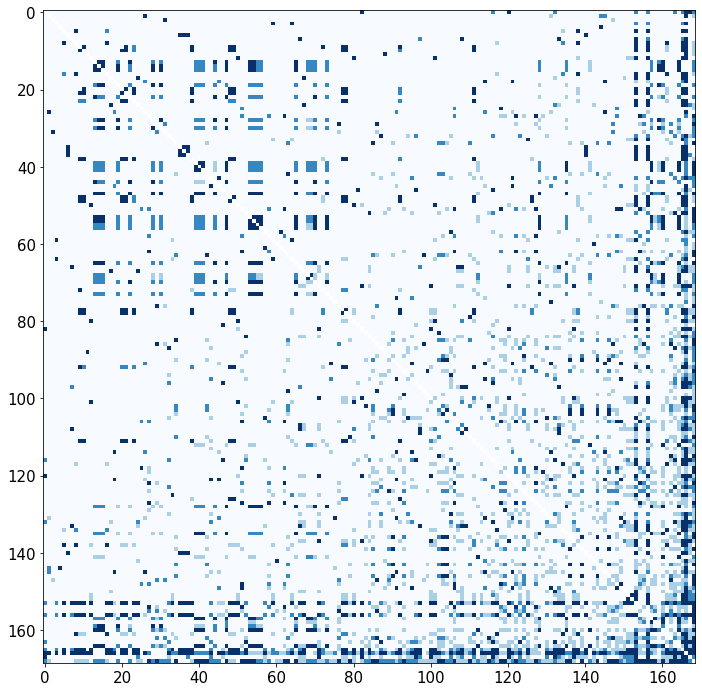

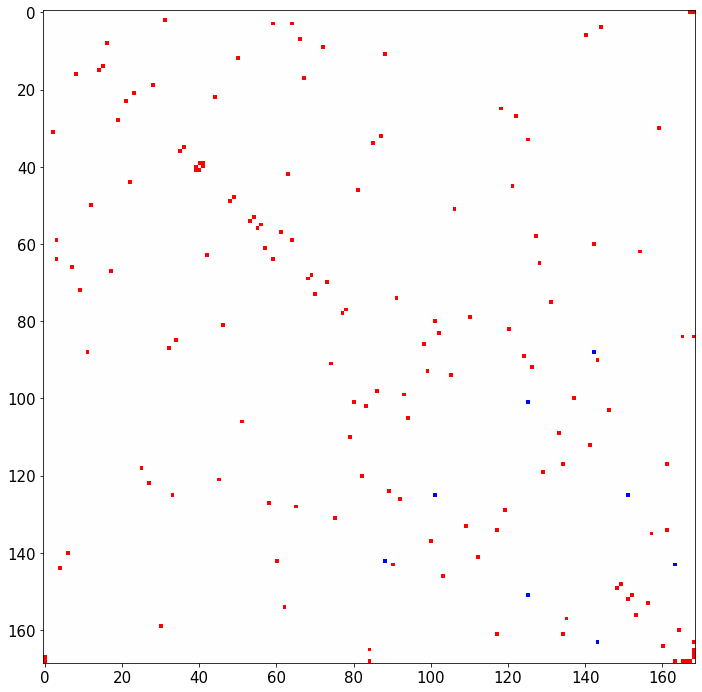

In [17]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.loc[between_centrality_ordered, between_centrality_ordered].values, cmap='Blues', interpolation='nearest')
plt.show()

plt.imshow(constraint_mtx.loc[between_centrality_ordered, between_centrality_ordered].values, cmap='bwr', interpolation='nearest')
plt.show()

In [18]:
guest_list_df.index = guest_list

In [19]:
guest_list_df

,Last Name,Party,Phone,Email,age,relationship,Street Address 1,Street Address 2,City,State/Province,...,Wedding Ceremony and Reception - RSVP,Wedding Ceremony and Reception - Do you require a vegetarian dinner,Wedding Ceremony and Reception - Please let us know of any food allergies,Wedding Ceremony and Reception - Thank You Sent,Wedding Ceremony and Reception - Gift Received,Send a note to the couple?,Unnamed: 23,Unnamed: 24,Pattison Family,24
Richard Pattison,Pattison,Richard Pattison,4408212849,mary.a.balzer@gmail.com,34,Pattison Family,"1236 N Flores St,",401,W Hollywood,CA,...,Attending,NaN,NaN,Not Sent,NaN,NaN,NaN,NaN,Pattison Family Friend,4.0
Kathryn Russell,Russell,Kathryn Russell & Tim Balzer,323-829-4040,kathrynrussellbalzer@gmail.com,68,Balzer Family,6734 Wedgewood Place,NaN,Los Angeles,CA,...,Attending,no,NaN,Not Sent,NaN,Can't wait!!,NaN,NaN,RRSD,1.0
Tim Balzer,Balzer,Kathryn Russell & Tim Balzer,NaN,NaN,69,Balzer Family,6734 Wedgewood Place,NaN,Los Angeles,CA,...,Attending,no,NaN,Not Sent,NaN,NaN,NaN,NaN,CMU,24.0
Mac Pattison,Pattison,Pattison Family,4124002585,Mac.Pattison@gmail.com,36,Pattison Family,3800 Fallwood Lane,NaN,Fredericksburg,VA,...,Attending,no,NaN,Not Sent,NaN,Can‚Äôt wait!!,NaN,NaN,UT,7.0
Ali Pattison,Pattison,Pattison Family,NaN,NaN,40,Pattison Family,3800 Fallwood Lane,NaN,Fredericksburg,VA,...,Attending,no,NaN,Not Sent,NaN,NaN,NaN,NaN,Richard Professional,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morgan Pattison,Pattison,NaN,NaN,NaN,46,Pattison Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MC Davault,Davault,NaN,NaN,NaN,70,Balzer Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ryan Hurley,Hurley,NaN,NaN,NaN,25,Balzer Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Michael Baldea,Baldea,NaN,NaN,NaN,41,Richard Professional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
category_map = {
    'Balzer Family': "Bride's Family",
    'Balzer Family Friend': "Bride's Family Friends",
    'CMU': "Tartans",
    'IHHS': "Pandas and Vikings",
    'Mary Professional': "Bride's Friend from Work",
    'Other': "Friends Met in the Wild",
    'PU': "Tigers",
    'Pattison Family': "Groom's Family",
    'Pattison Family Friend': "Groom's Family Friends",
    'RRSD': "Pirates",
    'Richard Professional': "Groom's Friends from Work",
    'UCLA': "Bruins",
    'UT': "Longhorns"
 }

In [21]:
guest_list_df['relationship'] = guest_list_df['relationship'].map(category_map)

In [22]:
guest_list_df.loc['Richard Pattison', 'relationship'] = 'Groom'
guest_list_df.loc['Mary Balzer', 'relationship'] = 'Bride'

In [23]:
category_map = {
    "Bride's Family": ('darkseagreen', 'black'),
    "Bride's Family Friends": ('seagreen', 'white'),
    "Tartans": ('rgb(137, 7, 4)', 'white'),
    "Pandas and Vikings": ('rgb(0, 0, 100)', 'white'),
    "Bride's Friend from Work": ('rgb(240, 30, 200)', 'black'),
    "Friends Met in the Wild": ('rgb(31, 104, 152)', 'white'),
    "Tigers": ('rgb(255, 94, 0)', 'black'),
    "Groom's Family": ('rgb(125, 65, 223)', 'white'),
    "Groom's Family Friends": ('rgb(170, 109, 185)', 'white'),
    "Pirates": ('crimson', 'white'),
    "Groom's Friends from Work": ('rgb(255, 210, 50)', 'black'),
    "Bruins": ('rgb(49, 100, 255)', 'white'),
    "Longhorns": ('rgb(228, 137, 0)', 'white'),
    "Groom": ('black', 'black'),
    "Bride": ('white', 'white')
 }

In [24]:
import plotly.graph_objects as go

In [66]:
pos_spring = nx.spring_layout(graph, weight='relationship_strength', k=None, seed=19) #13 works best thus far
# pos = nx.circular_layout(graph)
# pos = nx.shell_layout(graph)
# pos = nx.spectral_layout(graph)
pos_kamada = nx.kamada_kawai_layout(graph, )

In [67]:
# Specific for random seed 13
# pos_spring['Richard Pattison'][0] -= 0.04
# pos_spring['Mary Balzer'][0] -= 0.04

In [68]:
x_sorted = sorted(np.asarray([p.tolist() for p in pos_spring.values()])[:, 0])
y_sorted = sorted(np.asarray([p.tolist() for p in pos_spring.values()])[:, 1])

position = 3
xmin, xmax = x_sorted[position], x_sorted[-position]
ymin, ymax = y_sorted[position], y_sorted[-position]

In [69]:
for node in graph.nodes():
    pos_spring[node][0] = np.maximum(xmin, np.minimum(xmax, pos_spring[node][0]))
    pos_spring[node][1] = np.maximum(ymin, np.minimum(ymax, pos_spring[node][1]))
    

In [70]:
def dist(A, B):
    return np.linalg.norm(np.array(A)-np.array(B))
    
def get_mid_coord(A, B, f=0.02):
    x0, y0 = A
    x1, y1 = B
    r = dist(A, B)
    slope = - 1 / ((y1 - y0) / (x1 - x0))
    x_mid = (x0 + x1) / 2
    y_mid = (y0 + y1) / 2
    if f > 0:
        x_p = x_mid + np.sqrt(r * f / (1 + slope ** 2))
    else:
        x_p = x_mid - np.sqrt(-r * f / (1 + slope ** 2))
        
    y_p = y_mid + slope * (x_p - x_mid)
    return x_p, y_p

In [71]:
node_distances = pd.DataFrame(0, columns=guest_list, index=guest_list)
for g in guest_list:
    for gp in guest_list:
        node_distances.loc[g, gp] = np.sqrt(dist(pos_spring[g], pos_spring[gp]))

In [72]:
node_distances

,Richard Pattison,Kathryn Russell,Tim Balzer,Mac Pattison,Ali Pattison,Ella Pattison,Mary Pattison,William Pattison,Wally Pattison,Holly Pattison,...,Sean Martin,Nefeli Chondrogianni,Sean Neel,Jenny Falberg,Pat Jr. Pattison,Morgan Pattison,MC Davault,Ryan Hurley,Michael Baldea,Guest Baldea
Richard Pattison,0.000000,0.619120,0.624113,0.521954,0.544411,0.567281,0.558173,0.591359,0.447371,0.424874,...,0.551372,0.742861,0.744676,0.822256,0.600246,0.588531,0.742055,0.841878,0.722347,0.855359
Kathryn Russell,0.619120,0.000000,0.079884,0.793040,0.794982,0.783216,0.789170,0.795683,0.733723,0.713050,...,0.802305,0.919605,0.443370,0.544488,0.831015,0.831723,0.410316,0.588548,0.951035,1.055711
Tim Balzer,0.624113,0.079884,0.000000,0.796611,0.798370,0.786322,0.792397,0.798652,0.737502,0.716902,...,0.806260,0.922916,0.438744,0.539188,0.834174,0.835005,0.402509,0.584471,0.954322,1.058616
Mac Pattison,0.521954,0.793040,0.796611,0.000000,0.236178,0.376611,0.326316,0.405577,0.305512,0.352755,...,0.592216,0.770064,0.902399,0.961917,0.322387,0.276832,0.887743,0.984311,0.590475,0.717135
Ali Pattison,0.544411,0.794982,0.798370,0.236178,0.000000,0.297517,0.228168,0.330580,0.313057,0.353536,...,0.636599,0.805452,0.906586,0.962823,0.252808,0.247974,0.886754,0.987830,0.625084,0.735125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morgan Pattison,0.588531,0.831723,0.835005,0.276832,0.247974,0.361671,0.311163,0.376129,0.392861,0.428308,...,0.642459,0.802675,0.938348,0.993602,0.204567,0.000000,0.920411,1.017188,0.590282,0.695669
MC Davault,0.742055,0.410316,0.402509,0.887743,0.886754,0.870819,0.878548,0.880436,0.834209,0.815651,...,0.899875,1.001354,0.371377,0.385970,0.917720,0.920411,0.000000,0.479688,1.035503,1.131708
Ryan Hurley,0.841878,0.588548,0.584471,0.984311,0.987830,0.979693,0.984191,0.989672,0.938333,0.922660,...,0.958940,1.034104,0.393242,0.316234,1.017594,1.017188,0.479688,0.000000,1.103056,1.197999
Michael Baldea,0.722347,0.951035,0.954322,0.590475,0.625084,0.690114,0.663320,0.699831,0.655306,0.676360,...,0.577671,0.655745,1.032188,1.092609,0.622218,0.590282,1.035503,1.103056,0.000000,0.474833


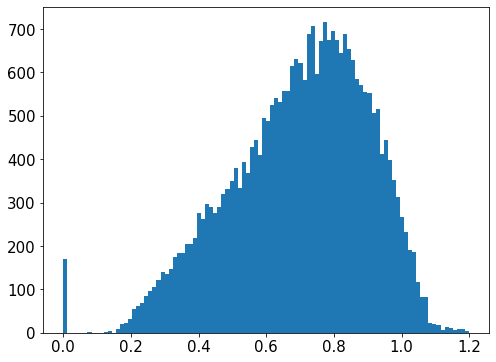

In [73]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 15
plt.hist(np.reshape(node_distances.values, (-1, 1)), bins=100)
plt.show()

In [74]:
def reposition(pt0, pt1, add=0.02):
    x0, y0 = pt0
    x1, y1 = pt1
    sign = 1 if x0 < x1 else -1
    
    slope = (y1 - y0) / (x1 - x0)
    angle = np.tanh(slope)
    dx1, dy1 = sign * 0.5 * add * np.array([np.cos(angle), np.sin(angle)])
    dx0, dy0 = - sign * 0.5 * add * np.array([np.cos(angle), np.sin(angle)])
    
    x0 += dx0
    y0 += dy0
    x1 += dx1
    y1 += dy1

    return (x0, y0), (x1, y1)

In [75]:
edge_traces = []
edge_info = []
for edge in graph.edges():
    
    x0, y0 = pos_spring[edge[0]]
    x1, y1 = pos_spring[edge[1]]
    if node_distances.loc[edge[0], edge[1]] < 0.15:
        print(edge[0])
        print(edge[1])
        (x0, y0), (x1, y1) = reposition((x0, y0), (x1, y1))
        pos_spring[edge[0]] = x0, y0
        pos_spring[edge[1]] = x1, y1
        node_distances.loc[edge[0], edge[1]] = np.sqrt(dist(pos_spring[edge[0]], pos_spring[edge[1]]))
        node_distances.loc[edge[1], edge[0]] = np.sqrt(dist(pos_spring[edge[1]], pos_spring[edge[0]]))

    weight = graph.get_edge_data(edge[0], edge[1])['relationship_strength']

    f_scale = 0.0
    f = f_scale if np.random.randint(2) else -f_scale

    x_p, y_p = get_mid_coord([x0, y0], [x1, y1], f)
    
    edge_traces += [go.Scatter(
        x=[x0, x_p, x1], y=[y0, y_p, y1],
        line=dict(width=weight/5, color='black', shape='spline'),
        mode='lines',
        showlegend=False,
        hoverinfo='none')]

    edge_info += [go.Scatter(
        x=[x_p], y=[y_p],
        mode='markers',
        marker=dict( size=0.1,  color='black'),
        text=[f'{edge[0]} <--> {edge[1]} <br> Weight: {int(weight)}'],
        hoverinfo='text',
        showlegend=False)]

Kathryn Russell
Tim Balzer
Anneli Ahlgren
Fanny Patriksson
Trish Davis
Ryan Neel
Sara Forsyth
Pete Ranges


/Users/richardpattison/anaconda3/envs/wedding_prep/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/richardpattison/anaconda3/envs/wedding_prep/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in double_scalars



In [76]:


node_traces = []
display_name_traces = []
for cat, (color, text_color) in category_map.items():
    size = 25 if cat not in ['Bride', 'Groom'] else 50
    text_size = 12 if cat not in ['Bride', 'Groom'] else 24
    node_names = []
    display_names = []
    node_x = []
    node_y = []
    for node in graph.nodes():
        if guest_list_df.loc[node, 'relationship'] != cat:
            continue

        x, y = pos_spring[node]
        node_x.append(x)
        node_y.append(y)
        node_names.append(node)
        display_names.append(node.split(' ')[0][0] + node.split(' ')[1][0])

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        text=[f"{n} <br> {cat}" for n in node_names],
        mode='markers',
        hoverinfo='text',
        name=cat,
        marker=dict(
            color=color,
            size=size,
            line_width=0.0))

    display_name_trace = go.Scatter(
        x=node_x, y=node_y,
        text=display_names,
        textfont=dict(
            color=text_color,
            size=text_size),
        mode='text',
        hoverinfo='none',
        name=None,
        marker=None,
        showlegend=False)

    node_traces.append(node_trace)
    display_name_traces.append(display_name_trace)


In [77]:
fig = go.Figure(data=edge_traces + node_traces + display_name_traces,
                layout=go.Layout(
                    title="Mary and Richard's wedding guest network",
                    titlefont_size=16,
                    width=1600,
                    height=1600,
                    showlegend=True,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
fig.show()

In [82]:
relationship_mtx.loc['Julia Senders', relationship_mtx.loc['Julia Senders']==1.0]

Richard Pattison    1.0
Calvin Tsay         1.0
Oscar Nordness      1.0
Name: Julia Senders, dtype: float64

In [37]:
fig.write_html('../data/transformed/wedding_network_model.html')